<a href="https://colab.research.google.com/github/melisapuspita/DOS-RNN/blob/main/DOS_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving coba.csv to coba (1).csv
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.0408 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0040 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0141 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0056 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0033 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0073 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0050 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0076 - loss: nan - val_accuracy: 0.0083 - val_loss: nan
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.0083
Precision: 0.0001
Recall: 0.0083
F1 Score: 0.0001


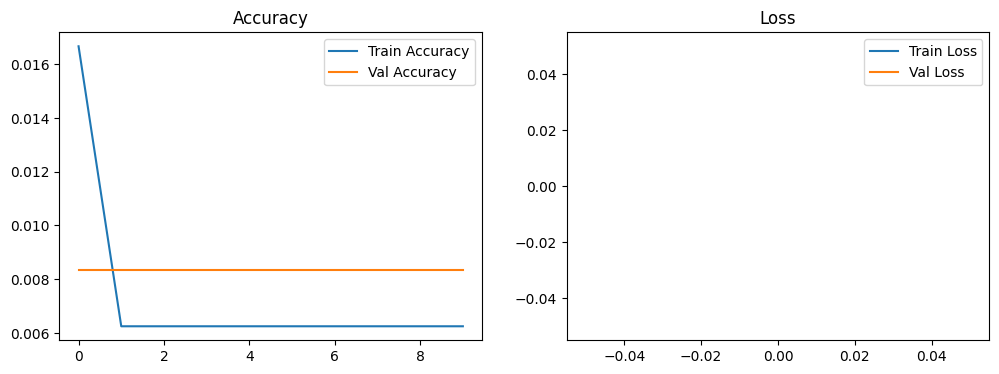

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset from Google Colab
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv(next(iter(uploaded)))

# Handle missing values
df.fillna(0, inplace=True)

# Encode categorical columns
if 'CAN ID' in df.columns and 'Flag' in df.columns:
    df['CAN ID'] = LabelEncoder().fit_transform(df['CAN ID'])
    # Convert 'Flag' column to string type before encoding
    df['Flag'] = df['Flag'].astype(str)
    df['Flag'] = LabelEncoder().fit_transform(df['Flag'])
else:
    raise KeyError("Missing required columns: 'CAN ID' and 'Flag'")

# Select features and target
feature_columns = ['CAN ID', 'DLC'] + [f'DATA[{i}]' for i in range(8) if f'DATA[{i}]' in df.columns]
if len(feature_columns) < 2:
    raise KeyError("Not enough feature columns found in dataset")

X = df[feature_columns]
y = df['Flag']

# Convert to numeric type
X = X.apply(pd.to_numeric, errors='coerce')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for RNN input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_reshaped.shape[1], 1)),
    tf.keras.layers.SimpleRNN(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
# Change 'binary' to 'weighted' for multi-class precision
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()